Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

Loading the datasets

In [2]:
train = pd.read_csv(r"D:\DS\HackerEarth_DS\Of Genomes and Genetics\85561676e53d11eb\dataset\train.csv")
test = pd.read_csv(r"D:\DS\HackerEarth_DS\Of Genomes and Genetics\85561676e53d11eb\dataset\test.csv")
print(train.shape)
print(test.shape)

(22083, 45)
(9465, 43)


In [3]:
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [5]:
ids = test['Patient Id']
ids

0       PID0x4175
1       PID0x21f5
2       PID0x49b8
3       PID0x2d97
4       PID0x58da
          ...    
9460    PID0x81e1
9461    PID0x3514
9462    PID0x5408
9463    PID0x2017
9464    PID0x7f61
Name: Patient Id, Length: 9465, dtype: object

# Exploratory Data Analysis

Removing unimportant column data, renaming them, looking at target variables, handling missing values

Lets start by listing out some UNimportant features (according to me)

In [6]:
print(train.shape)
print(train.columns)

(22083, 45)
Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Sy

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [8]:
# Lets start by listing out some UNimportant features (according to me)

# Patient Id
# Patient First Name
# Family Name
# Father' name
# Institute Name
# Parental consent,etc
train.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name","Mother's age","Father's age",'Location of Institute', 'Institute Name', 'Parental consent'], inplace = True, axis=1)
train.drop( ['Test 1','Test 2','Test 3','Test 4', 'Test 5', 'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5'], inplace=True, axis=1 )

test.drop(['Patient Id', 'Patient First Name', 'Family Name', "Father's name","Mother's age","Father's age",'Location of Institute', 'Institute Name', 'Parental consent'], inplace = True, axis=1)
test.drop( ['Test 1','Test 2','Test 3','Test 4', 'Test 5', 'Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5'], inplace=True, axis=1 )

print(train.shape)
print(test.shape)

(22083, 26)
(9465, 24)


In [9]:
# Renaming column names for better understanding and processing
train.rename( columns = {
    'Patient Age' : 'Patient_age',
    "Genes in mother's side" : "Genes_mother_side",
    "Inherited from father" : "Genes_father_side",
    'Maternal gene' : 'Genes_maternal_side',
    'Paternal gene' : 'Genes_paternal_side',
    'Blood cell count (mcL)' : 'Blood_cell_count_mcL',
    'Respiratory Rate (breaths/min)' : 'Respiratory_rate',
    'Heart Rate (rates/min' : 'Heart_rate',
    'Follow-up' : 'Follow_up',
    'Birth asphyxia' : 'Birth_asphyxia',
    'Autopsy shows birth defect (if applicable)' : 'Autopsy_birth_defect',
    'Place of birth' : 'Place_of_birth',
    'Folic acid details (peri-conceptional)' : 'Folic_acid_details',
    'H/O serious maternal illness' : 'Serious_maternal_illness',
    'H/O radiation exposure (x-ray)' : 'Radiation_exposure',
    'H/O substance abuse' : 'Substance_abuse',
    'Assisted conception IVF/ART' : 'Assisted_conception',
    'History of anomalies in previous pregnancies' : 'History_of_anomalies_in_previous_pregnancies',
    'No. of previous abortion' : 'No_of_previous_abortions',
    'Birth defects' : 'Birth_defects',
    'White Blood cell count (thousand per microliter)' : 'White_blood_cell_count',
    'Blood test result' : 'Blood_test_result',
    'Genetic Disorder' : 'Genetic_disorder',
    'Disorder Subclass' : 'Disorder_subclass',
    
    
    
}, inplace=True
)

test.rename( columns = {
    'Patient Age' : 'Patient_age',
    "Genes in mother's side" : "Genes_mother_side",
    "Inherited from father" : "Genes_father_side",
    'Maternal gene' : 'Genes_maternal_side',
    'Paternal gene' : 'Genes_paternal_side',
    'Blood cell count (mcL)' : 'Blood_cell_count_mcL',
    'Respiratory Rate (breaths/min)' : 'Respiratory_rate',
    'Heart Rate (rates/min' : 'Heart_rate',
    'Follow-up' : 'Follow_up',
    'Birth asphyxia' : 'Birth_asphyxia',
    'Autopsy shows birth defect (if applicable)' : 'Autopsy_birth_defect',
    'Place of birth' : 'Place_of_birth',
    'Folic acid details (peri-conceptional)' : 'Folic_acid_details',
    'H/O serious maternal illness' : 'Serious_maternal_illness',
    'H/O radiation exposure (x-ray)' : 'Radiation_exposure',
    'H/O substance abuse' : 'Substance_abuse',
    'Assisted conception IVF/ART' : 'Assisted_conception',
    'History of anomalies in previous pregnancies' : 'History_of_anomalies_in_previous_pregnancies',
    'No. of previous abortion' : 'No_of_previous_abortions',
    'Birth defects' : 'Birth_defects',
    'White Blood cell count (thousand per microliter)' : 'White_blood_cell_count',
    'Blood test result' : 'Blood_test_result',
    'Genetic Disorder' : 'Genetic_disorder',
    'Disorder Subclass' : 'Disorder_subclass',
    
    
    
}, inplace=True
)

In [10]:
print(train.columns)
print(test.columns)

Index(['Patient_age', 'Genes_mother_side', 'Genes_father_side',
       'Genes_maternal_side', 'Genes_paternal_side', 'Blood_cell_count_mcL',
       'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_birth_defect', 'Place_of_birth',
       'Folic_acid_details', 'Serious_maternal_illness', 'Radiation_exposure',
       'Substance_abuse', 'Assisted_conception',
       'History_of_anomalies_in_previous_pregnancies',
       'No_of_previous_abortions', 'Birth_defects', 'White_blood_cell_count',
       'Blood_test_result', 'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')
Index(['Patient_age', 'Genes_mother_side', 'Genes_father_side',
       'Genes_maternal_side', 'Genes_paternal_side', 'Blood_cell_count_mcL',
       'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_birth_defect', 'Place_of_birth',
       'Folic_acid_details', 'Serious_maternal_illness', 'Radiation_exposure',
    

Taking a look at our target variabless : Genetic disorder & Disorder subclass

In [11]:
train.loc[:, ['Genetic_disorder','Disorder_subclass']]

,Genetic_disorder,Disorder_subclass
0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,NaN,Cystic fibrosis
2,Multifactorial genetic inheritance disorders,Diabetes
3,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,Multifactorial genetic inheritance disorders,Cancer
...,...,...
22078,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,Multifactorial genetic inheritance disorders,Diabetes
22080,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,NaN,Leigh syndrome


In [12]:
print(train['Genetic_disorder'].unique())
print('--------')
print(train['Genetic_disorder'].value_counts())

['Mitochondrial genetic inheritance disorders' nan
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
--------
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic_disorder, dtype: int64


In [13]:
print(train['Disorder_subclass'].unique())
print('--------')
print(train['Disorder_subclass'].value_counts())

["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' nan "Alzheimer's"]
--------
Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder_subclass, dtype: int64


Text(0.5, 1.0, 'Label Variables (Target Variable 2)')

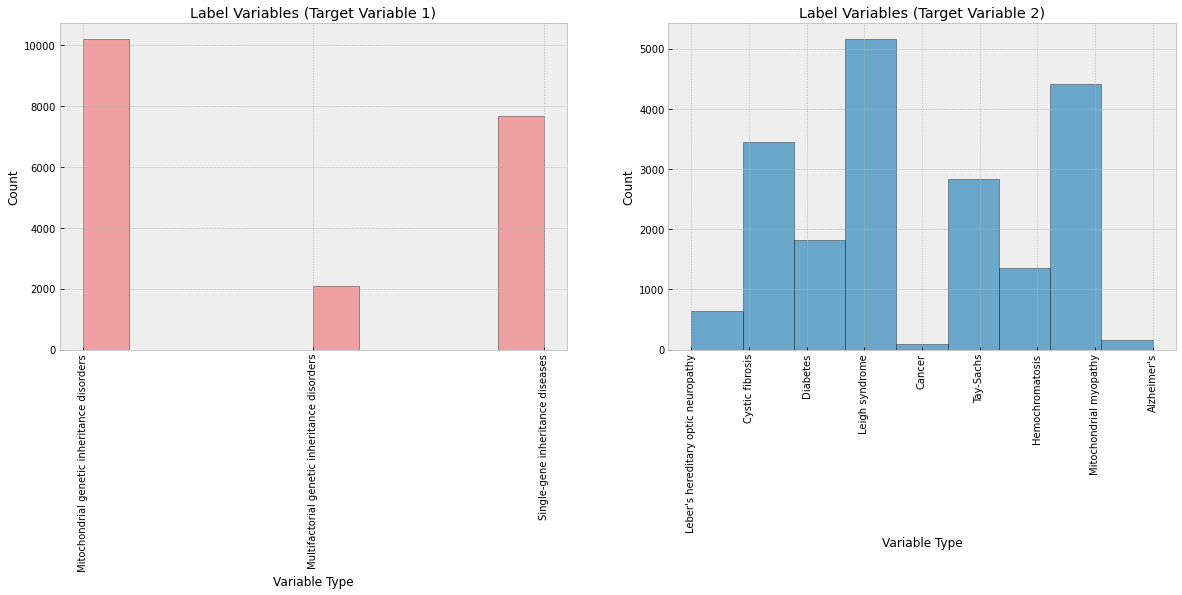

In [14]:
# Histogram plots of label values
plt.style.use('bmh')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))


train['Genetic_disorder'].hist(edgecolor= 'black', ax=ax1, alpha=0.7, color = '#F08080')
ax1.tick_params(axis='x', labelrotation=90 )
ax1.set_xlabel('Variable Type')
ax1.set_ylabel('Count')
ax1.set_title('Label Variables (Target Variable 1)')

ax2 = train['Disorder_subclass'].hist(bins= 9,ax=ax2 ,edgecolor='black', alpha=0.7)
ax2.tick_params(axis='x', labelrotation=90 )
ax2.set_xlabel('Variable Type')
ax2.set_ylabel('Count')
ax2.set_title('Label Variables (Target Variable 2)')

In [15]:
print(train.Genetic_disorder.describe())
print('--------------------------------')
print(train.Disorder_subclass.describe())

count                                           19937
unique                                              3
top       Mitochondrial genetic inheritance disorders
freq                                            10202
Name: Genetic_disorder, dtype: object
--------------------------------
count              19915
unique                 9
top       Leigh syndrome
freq                5160
Name: Disorder_subclass, dtype: object


Relationship of target variables with Numerical features

In [16]:
categorical_features = [ cname for cname in train.columns if train[cname].dtype in ['object'] ]
categorical_features.remove('Genetic_disorder')
categorical_features.remove('Disorder_subclass')

numerical_features = [ cname for cname in train.columns if train[cname].dtype in ['int64','float64'] ]
print(categorical_features)
print('-----------------------------------------')
print(numerical_features)

['Genes_mother_side', 'Genes_father_side', 'Genes_maternal_side', 'Genes_paternal_side', 'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender', 'Birth_asphyxia', 'Autopsy_birth_defect', 'Place_of_birth', 'Folic_acid_details', 'Serious_maternal_illness', 'Radiation_exposure', 'Substance_abuse', 'Assisted_conception', 'History_of_anomalies_in_previous_pregnancies', 'Birth_defects', 'Blood_test_result']
-----------------------------------------
['Patient_age', 'Blood_cell_count_mcL', 'No_of_previous_abortions', 'White_blood_cell_count']


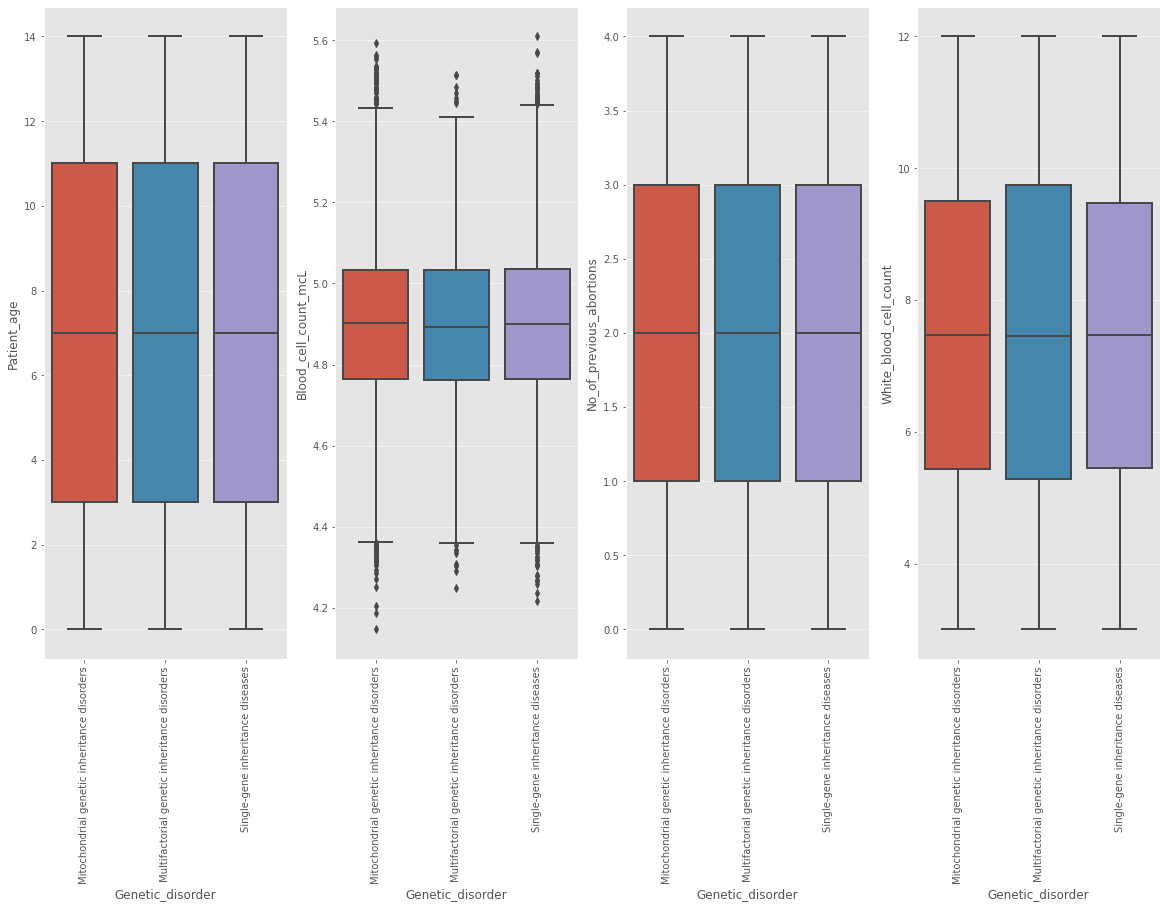

In [17]:
# Relationship of Target variables with Numerical variables
plt.style.use('ggplot')
labels = train.Genetic_disorder.unique()

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,12))

sns.boxplot( ax= ax1, x='Genetic_disorder', y='Patient_age', data=train )
ax1.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax2,x='Genetic_disorder', y='Blood_cell_count_mcL', data=train )
ax2.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax3,x='Genetic_disorder', y='No_of_previous_abortions', data=train )
ax3.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax4,x='Genetic_disorder', y='White_blood_cell_count', data=train )
ax4.tick_params(axis='x', labelrotation=90 )

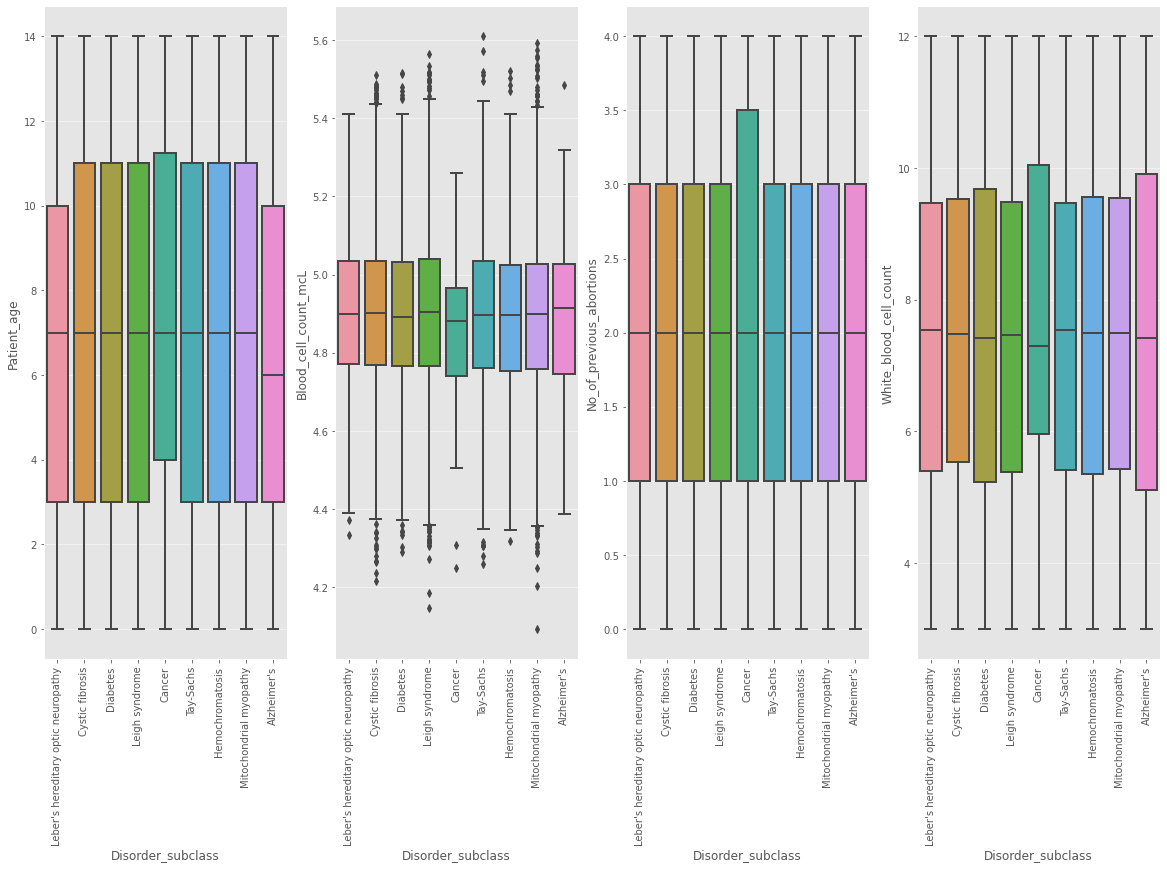

In [18]:
plt.style.use('ggplot')
labels = train.Disorder_subclass.unique()

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,12))

sns.boxplot( ax= ax1, x='Disorder_subclass', y='Patient_age', data=train )
ax1.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax2,x='Disorder_subclass', y='Blood_cell_count_mcL', data=train )
ax2.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax3,x='Disorder_subclass', y='No_of_previous_abortions', data=train )
ax3.tick_params(axis='x', labelrotation=90 )

sns.boxplot( ax= ax4,x='Disorder_subclass', y='White_blood_cell_count', data=train )
ax4.tick_params(axis='x', labelrotation=90 )

In [19]:
#Takeaways
#Blood_cell_count_mcL has outliers for both the target variables

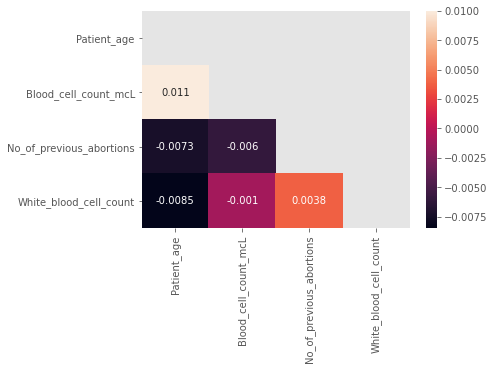

In [20]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,vmax=0.01, mask = mask, annot=True)
plt.show()

<Figure size 864x576 with 0 Axes>

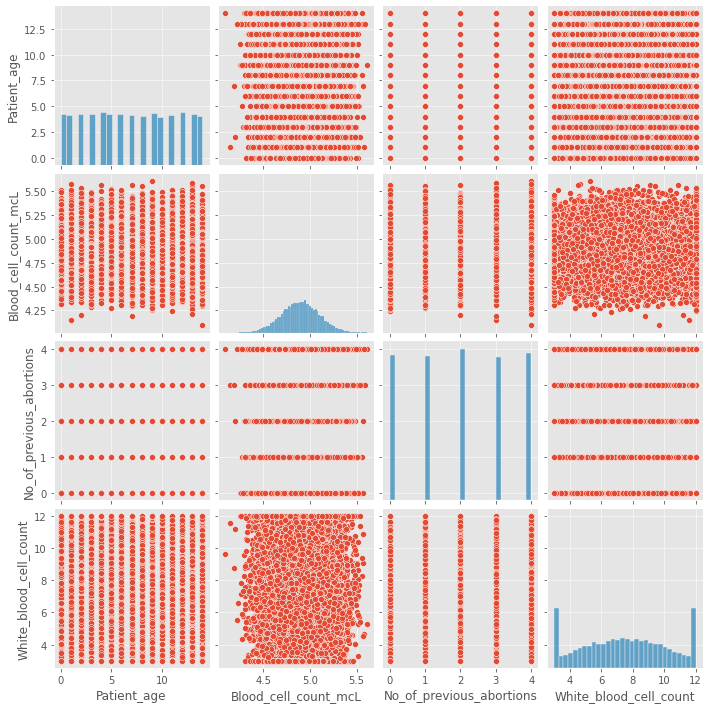

In [21]:
plt.figure(figsize=(12,8))
sns.pairplot( train[numerical_features] )
plt.show()

In [22]:
# Handling missiing values

print(train.shape)
print(np.prod(train.shape))
print(train.isnull().sum().sum())
print( (train.isnull().sum().sum())/(np.prod(train.shape)) )
print('------------------------------------')
print(test.shape)
print(np.prod(test.shape))
print(test.isnull().sum().sum())
print( (test.isnull().sum().sum())/(np.prod(test.shape)) )

(22083, 26)
574158
44267
0.07709898669007485
------------------------------------
(9465, 24)
227160
10060
0.044285965839056175


In [23]:
train.isnull().sum().sort_values(ascending=False)

Genes_maternal_side                             2810
Substance_abuse                                 2195
Gender                                          2173
History_of_anomalies_in_previous_pregnancies    2172
Disorder_subclass                               2168
Follow_up                                       2166
No_of_previous_abortions                        2162
Birth_defects                                   2154
Radiation_exposure                              2153
Serious_maternal_illness                        2152
Respiratory_rate                                2149
White_blood_cell_count                          2148
Genetic_disorder                                2146
Blood_test_result                               2145
Birth_asphyxia                                  2139
Place_of_birth                                  2124
Assisted_conception                             2122
Folic_acid_details                              2117
Heart_rate                                    

In [24]:
test.isnull().sum().sort_values(ascending=False)

Genes_maternal_side                             3723
Heart_rate                                      2900
Respiratory_rate                                2886
Genes_father_side                                551
Patient_age                                        0
Folic_acid_details                                 0
White_blood_cell_count                             0
Birth_defects                                      0
No_of_previous_abortions                           0
History_of_anomalies_in_previous_pregnancies       0
Assisted_conception                                0
Substance_abuse                                    0
Radiation_exposure                                 0
Serious_maternal_illness                           0
Autopsy_birth_defect                               0
Place_of_birth                                     0
Genes_mother_side                                  0
Birth_asphyxia                                     0
Gender                                        

In [25]:
test.No_of_previous_abortions.value_counts()

-99    2096
 3     1521
 2     1498
 4     1468
 0     1449
 1     1433
Name: No_of_previous_abortions, dtype: int64

In [26]:
train.dropna(subset=['Genetic_disorder', 'Disorder_subclass'], how='any', inplace=True)
train.dropna(axis=1, how="all", inplace=True)
train.dropna(axis=0, how='all', inplace=True)

test.dropna(axis=1, how="all", inplace=True)
test.dropna(axis=0, how='all', inplace=True)
print(train.shape)
print(test.shape)

(18047, 26)
(9465, 24)


In [27]:
#Checking for categorical columns with high cardinality
object_cols = [ train[cname].nunique() for cname in categorical_features] 
object_cols

#There arent any( cardinality <10 ) 

[2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4]

In [33]:
train.Genes_maternal_side.fillna(method='bfill', inplace=True)

train.Substance_abuse.replace( to_replace='-', value = np.nan, inplace=True )
train.Substance_abuse.replace( to_replace='Not applicable', value = np.nan, inplace=True )
train.Substance_abuse.fillna(method='bfill', inplace=True)

train.History_of_anomalies_in_previous_pregnancies.fillna(method='bfill', inplace=True)

avg_wbc = np.nanmean(train.White_blood_cell_count)
train.White_blood_cell_count.fillna(avg_wbc, inplace=True)

train.Place_of_birth.fillna(method='bfill', inplace=True)

train.Assisted_conception.fillna(method='bfill', inplace=True)

train.Radiation_exposure.replace( to_replace='-', value = np.nan, inplace=True )
train.Radiation_exposure.replace( to_replace='Not applicable', value = np.nan, inplace=True )
train.Radiation_exposure.fillna(method='bfill', inplace=True)
train.Radiation_exposure.fillna('Yes', inplace=True)


train.Follow_up.fillna(method='bfill', inplace=True)

train.Gender.fillna('Ambiguous', inplace=True)

train.Respiratory_rate.fillna(method='bfill', inplace=True)

train.Birth_defects.fillna(method='bfill', inplace=True)

train.Folic_acid_details.fillna(method='bfill', inplace=True)

train.Blood_test_result.fillna('inconclusive', inplace=True)

train.Serious_maternal_illness.fillna(method='bfill', inplace=True)

train.Birth_asphyxia.replace(to_replace='No record', value=np.nan , inplace=True)
train.Birth_asphyxia.replace( to_replace='Not applicable', value = np.nan, inplace=True )
train.Birth_asphyxia.fillna(method='bfill', inplace=True)


median_abortions = train.No_of_previous_abortions.median()
train.No_of_previous_abortions.fillna(median_abortions, inplace=True)

train.Heart_rate.fillna(method='bfill', inplace=True)

median_age = train.Patient_age.median()
train.Patient_age.fillna(median_age, inplace=True)

train.Autopsy_birth_defect.replace( to_replace='None', value=np.nan , inplace=True )
train.Autopsy_birth_defect.replace( to_replace='Not applicable', value = np.nan, inplace=True )
train.Autopsy_birth_defect.fillna(method='bfill', inplace=True)
train.Autopsy_birth_defect.fillna('Yes', inplace=True)

train.Genes_father_side.fillna(method='bfill', inplace=True)

In [34]:
test.Genes_maternal_side.fillna(method='bfill', inplace=True)

test.Heart_rate.replace( to_replace='-99', value = np.nan, inplace=True )
test.Heart_rate.fillna(method='bfill',inplace=True)

test.Respiratory_rate.replace( to_replace='-99', value = np.nan, inplace=True )
test.Respiratory_rate.fillna(method='bfill',inplace=True)

test.Genes_father_side.fillna(method='bfill', inplace=True)

test.White_blood_cell_count.replace( to_replace=-99, value = np.nan, inplace=True )
test.White_blood_cell_count.fillna(method='bfill', inplace=True)

test.Birth_defects.replace( to_replace='-99', value = np.nan, inplace=True )
test.Birth_defects.fillna(method='bfill',inplace=True)

test.No_of_previous_abortions.replace( to_replace=-99, value = np.nan, inplace=True )
test.No_of_previous_abortions.fillna(method='bfill',inplace=True)

test.History_of_anomalies_in_previous_pregnancies.replace( to_replace='-99', value = np.nan, inplace=True )
test.History_of_anomalies_in_previous_pregnancies.fillna(method='bfill',inplace=True)

test.Assisted_conception.replace( to_replace='-99', value = np.nan, inplace=True )
test.Assisted_conception.fillna(method='bfill',inplace=True)

test.Substance_abuse.replace( to_replace='-99', value = np.nan, inplace=True )
test.Substance_abuse.replace( to_replace='-', value = np.nan, inplace=True )
test.Substance_abuse.replace( to_replace='Not applicable', value = np.nan, inplace=True )
test.Substance_abuse.fillna(method='ffill',inplace=True)
test.Substance_abuse.fillna('Yes', inplace=True)

test.Radiation_exposure.replace( to_replace='-99', value = np.nan, inplace=True )
test.Radiation_exposure.replace( to_replace='-', value = np.nan, inplace=True )
test.Radiation_exposure.replace( to_replace='Not applicable', value = np.nan, inplace=True )
test.Radiation_exposure.fillna(method='bfill',inplace=True)
test.Radiation_exposure.fillna('Yes', inplace=True)

test.Serious_maternal_illness.replace( to_replace='-99', value = np.nan, inplace=True )
test.Serious_maternal_illness.fillna(method= 'bfill',inplace=True)

test.Folic_acid_details.replace( to_replace='-99', value = np.nan, inplace=True )
test.Folic_acid_details.fillna(method= 'bfill',inplace=True)

test.Place_of_birth.replace( to_replace='-99', value = np.nan, inplace=True )
test.Place_of_birth.fillna(method= 'bfill',inplace=True)

test.Autopsy_birth_defect.replace( to_replace='-99', value = np.nan, inplace=True )
test.Autopsy_birth_defect.replace( to_replace='None', value = np.nan, inplace=True )
test.Autopsy_birth_defect.replace( to_replace='Not applicable', value = np.nan, inplace=True )
test.Autopsy_birth_defect.fillna(method='ffill',inplace=True)
test.Autopsy_birth_defect.fillna('Yes', inplace=True)

test.Birth_asphyxia.replace( to_replace='-99', value = np.nan, inplace=True )
test.Birth_asphyxia.replace( to_replace='No record', value = np.nan, inplace=True )
test.Birth_asphyxia.replace( to_replace='Not available', value = np.nan, inplace=True )
test.Birth_asphyxia.fillna(method='ffill',inplace=True)
test.Birth_asphyxia.fillna('Yes', inplace=True)

test.Gender.replace( to_replace='-99', value = np.nan, inplace=True )
test.Gender.fillna(method='ffill',inplace=True)

test.Follow_up.replace( to_replace='-99', value = np.nan, inplace=True )
test.Follow_up.fillna(method='ffill',inplace=True)

test.Blood_test_result.replace( to_replace='-99', value = np.nan, inplace=True )
test.Blood_test_result.replace( to_replace='inconclusive', value = np.nan, inplace=True )
test.Blood_test_result.fillna(method='bfill',inplace=True)

In [35]:
train.isnull().sum().sort_values(ascending=False)

Patient_age                                     0
Genes_mother_side                               0
Genetic_disorder                                0
Blood_test_result                               0
White_blood_cell_count                          0
Birth_defects                                   0
No_of_previous_abortions                        0
History_of_anomalies_in_previous_pregnancies    0
Assisted_conception                             0
Substance_abuse                                 0
Radiation_exposure                              0
Serious_maternal_illness                        0
Folic_acid_details                              0
Place_of_birth                                  0
Autopsy_birth_defect                            0
Birth_asphyxia                                  0
Gender                                          0
Follow_up                                       0
Heart_rate                                      0
Respiratory_rate                                0


In [36]:
test.isnull().sum().sort_values(ascending=False)

Patient_age                                     0
Genes_mother_side                               0
White_blood_cell_count                          0
Birth_defects                                   0
No_of_previous_abortions                        0
History_of_anomalies_in_previous_pregnancies    0
Assisted_conception                             0
Substance_abuse                                 0
Radiation_exposure                              0
Serious_maternal_illness                        0
Folic_acid_details                              0
Place_of_birth                                  0
Autopsy_birth_defect                            0
Birth_asphyxia                                  0
Gender                                          0
Follow_up                                       0
Heart_rate                                      0
Respiratory_rate                                0
Status                                          0
Blood_cell_count_mcL                            0


In [37]:
#Done with missing values

In [38]:
print(train.shape)
print(test.shape)

(18047, 26)
(9465, 24)


In [39]:
train.Blood_cell_count_mcL = train.Blood_cell_count_mcL.round(2)
train.White_blood_cell_count = train.White_blood_cell_count.round(2)
train.Patient_age = train.Patient_age.astype('int64')
train.No_of_previous_abortions = train.No_of_previous_abortions.astype('int64')
train.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result,Genetic_disorder,Disorder_subclass
0,2,Yes,No,Yes,No,4.76,Alive,Normal (30-60),Normal,High,...,No,No,No,Yes,2,Singular,9.86,inconclusive,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6,Yes,No,No,No,4.89,Alive,Normal (30-60),Tachycardia,Low,...,Yes,No,Yes,Yes,4,Singular,7.48,normal,Multifactorial genetic inheritance disorders,Diabetes
3,12,Yes,No,Yes,No,4.71,Deceased,Tachypnea,Normal,High,...,No,No,Yes,Yes,1,Singular,7.92,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11,Yes,No,Yes,Yes,4.72,Alive,Tachypnea,Tachycardia,Low,...,No,No,Yes,No,4,Multiple,4.10,inconclusive,Multifactorial genetic inheritance disorders,Cancer
5,14,Yes,No,Yes,No,5.10,Deceased,Normal (30-60),Normal,Low,...,No,No,Yes,No,0,Multiple,10.27,normal,Single-gene inheritance diseases,Cystic fibrosis


In [40]:
test.Blood_cell_count_mcL = test.Blood_cell_count_mcL.round(2)
test.White_blood_cell_count = test.White_blood_cell_count.round(2)
test.Patient_age = test.Patient_age.astype('int64')
test.No_of_previous_abortions = test.No_of_previous_abortions.astype('int64')
test.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result
0,6,No,Yes,No,No,4.98,Alive,Tachypnea,Normal,Low,...,Yes,No,Yes,Yes,No,Yes,2,Multiple,8.18,slightly abnormal
1,10,Yes,No,No,Yes,5.12,Alive,Tachypnea,Normal,Low,...,Yes,No,Yes,Yes,No,Yes,0,Multiple,8.18,normal
2,5,No,Yes,No,No,4.88,Deceased,Tachypnea,Normal,Low,...,No,Yes,Yes,Yes,Yes,No,0,Singular,6.88,slightly abnormal
3,13,No,Yes,Yes,No,4.69,Alive,Tachypnea,Tachycardia,Low,...,Yes,Yes,Yes,Yes,No,Yes,0,Singular,6.88,normal
4,5,No,No,No,Yes,5.15,Deceased,Tachypnea,Tachycardia,Low,...,Yes,Yes,Yes,Yes,No,No,0,Multiple,6.20,normal


In [41]:
#train = pd.get_dummies(train)
#print(train.shape)
#train.head()
label_train = train.copy()
label_test = test.copy()
print(label_train.shape)
print(label_test.shape)
label_train.head()

(18047, 26)
(9465, 24)


,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result,Genetic_disorder,Disorder_subclass
0,2,Yes,No,Yes,No,4.76,Alive,Normal (30-60),Normal,High,...,No,No,No,Yes,2,Singular,9.86,inconclusive,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6,Yes,No,No,No,4.89,Alive,Normal (30-60),Tachycardia,Low,...,Yes,No,Yes,Yes,4,Singular,7.48,normal,Multifactorial genetic inheritance disorders,Diabetes
3,12,Yes,No,Yes,No,4.71,Deceased,Tachypnea,Normal,High,...,No,No,Yes,Yes,1,Singular,7.92,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11,Yes,No,Yes,Yes,4.72,Alive,Tachypnea,Tachycardia,Low,...,No,No,Yes,No,4,Multiple,4.10,inconclusive,Multifactorial genetic inheritance disorders,Cancer
5,14,Yes,No,Yes,No,5.10,Deceased,Normal (30-60),Normal,Low,...,No,No,Yes,No,0,Multiple,10.27,normal,Single-gene inheritance diseases,Cystic fibrosis


In [42]:
#EDA complete
print(train.columns)
train.Blood_test_result

Index(['Patient_age', 'Genes_mother_side', 'Genes_father_side',
       'Genes_maternal_side', 'Genes_paternal_side', 'Blood_cell_count_mcL',
       'Status', 'Respiratory_rate', 'Heart_rate', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_birth_defect', 'Place_of_birth',
       'Folic_acid_details', 'Serious_maternal_illness', 'Radiation_exposure',
       'Substance_abuse', 'Assisted_conception',
       'History_of_anomalies_in_previous_pregnancies',
       'No_of_previous_abortions', 'Birth_defects', 'White_blood_cell_count',
       'Blood_test_result', 'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')


0             inconclusive
2                   normal
3             inconclusive
4             inconclusive
5                   normal
               ...        
22077    slightly abnormal
22078         inconclusive
22079         inconclusive
22080               normal
22082               normal
Name: Blood_test_result, Length: 18047, dtype: object

In [43]:
labelencoder = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()

label_train['Genetic_disorder'] = labelencoder1.fit_transform(train['Genetic_disorder'])
label_train['Disorder_subclass'] = labelencoder2.fit_transform(train['Disorder_subclass'])

label_train['Genes_mother_side'] = labelencoder.fit_transform(train['Genes_mother_side'])
label_train['Genes_father_side'] = labelencoder.fit_transform(train['Genes_father_side'])
label_train['Genes_maternal_side'] = labelencoder.fit_transform(train['Genes_maternal_side'])
label_train['Genes_paternal_side'] = labelencoder.fit_transform(train['Genes_paternal_side'])
label_train['Status'] = labelencoder.fit_transform(train['Status'])
label_train['Respiratory_rate'] = labelencoder.fit_transform(train['Respiratory_rate'])
label_train['Heart_rate'] = labelencoder.fit_transform(train['Heart_rate'])
label_train['Follow_up'] = labelencoder.fit_transform(train['Follow_up'])
label_train['Gender'] = labelencoder.fit_transform(train['Gender'])
label_train['Birth_asphyxia'] = labelencoder.fit_transform(train['Birth_asphyxia'])
label_train['Autopsy_birth_defect'] = labelencoder.fit_transform(train['Autopsy_birth_defect'])
label_train['Place_of_birth'] = labelencoder.fit_transform(train['Place_of_birth'])
label_train['Genes_mother_side'] = labelencoder.fit_transform(train['Genes_mother_side'])
label_train['Folic_acid_details'] = labelencoder.fit_transform(train['Folic_acid_details'])
label_train['Serious_maternal_illness'] = labelencoder.fit_transform(train['Serious_maternal_illness'])
label_train['Radiation_exposure'] = labelencoder.fit_transform(train['Radiation_exposure'])
label_train['Substance_abuse'] = labelencoder.fit_transform(train['Substance_abuse'])
label_train['Assisted_conception'] = labelencoder.fit_transform(train['Assisted_conception'])
label_train['History_of_anomalies_in_previous_pregnancies'] = labelencoder.fit_transform(train['History_of_anomalies_in_previous_pregnancies'])
label_train['Birth_defects'] = labelencoder.fit_transform(train['Birth_defects'])
label_train['Blood_test_result'] = labelencoder.fit_transform(train['Blood_test_result'])

#--------------------------------------------------------------------------------

label_test['Genes_mother_side'] = labelencoder.fit_transform(test['Genes_mother_side'])
label_test['Genes_father_side'] = labelencoder.fit_transform(test['Genes_father_side'])
label_test['Genes_maternal_side'] = labelencoder.fit_transform(test['Genes_maternal_side'])
label_test['Genes_paternal_side'] = labelencoder.fit_transform(test['Genes_paternal_side'])
label_test['Status'] = labelencoder.fit_transform(test['Status'])
label_test['Respiratory_rate'] = labelencoder.fit_transform(test['Respiratory_rate'])
label_test['Heart_rate'] = labelencoder.fit_transform(test['Heart_rate'])
label_test['Follow_up'] = labelencoder.fit_transform(test['Follow_up'])
label_test['Gender'] = labelencoder.fit_transform(test['Gender'])
label_test['Birth_asphyxia'] = labelencoder.fit_transform(test['Birth_asphyxia'])
label_test['Autopsy_birth_defect'] = labelencoder.fit_transform(test['Autopsy_birth_defect'])
label_test['Place_of_birth'] = labelencoder.fit_transform(test['Place_of_birth'])
label_test['Genes_mother_side'] = labelencoder.fit_transform(test['Genes_mother_side'])
label_test['Folic_acid_details'] = labelencoder.fit_transform(test['Folic_acid_details'])
label_test['Serious_maternal_illness'] = labelencoder.fit_transform(test['Serious_maternal_illness'])
label_test['Radiation_exposure'] = labelencoder.fit_transform(test['Radiation_exposure'])
label_test['Substance_abuse'] = labelencoder.fit_transform(test['Substance_abuse'])
label_test['Assisted_conception'] = labelencoder.fit_transform(test['Assisted_conception'])
label_test['History_of_anomalies_in_previous_pregnancies'] = labelencoder.fit_transform(test['History_of_anomalies_in_previous_pregnancies'])
label_test['Birth_defects'] = labelencoder.fit_transform(test['Birth_defects'])
label_test['Blood_test_result'] = labelencoder.fit_transform(test['Blood_test_result'])


In [44]:
train.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result,Genetic_disorder,Disorder_subclass
0,2,Yes,No,Yes,No,4.76,Alive,Normal (30-60),Normal,High,...,No,No,No,Yes,2,Singular,9.86,inconclusive,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6,Yes,No,No,No,4.89,Alive,Normal (30-60),Tachycardia,Low,...,Yes,No,Yes,Yes,4,Singular,7.48,normal,Multifactorial genetic inheritance disorders,Diabetes
3,12,Yes,No,Yes,No,4.71,Deceased,Tachypnea,Normal,High,...,No,No,Yes,Yes,1,Singular,7.92,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11,Yes,No,Yes,Yes,4.72,Alive,Tachypnea,Tachycardia,Low,...,No,No,Yes,No,4,Multiple,4.10,inconclusive,Multifactorial genetic inheritance disorders,Cancer
5,14,Yes,No,Yes,No,5.10,Deceased,Normal (30-60),Normal,Low,...,No,No,Yes,No,0,Multiple,10.27,normal,Single-gene inheritance diseases,Cystic fibrosis


In [45]:
label_train.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result,Genetic_disorder,Disorder_subclass
0,2,1,0,1,0,4.76,0,0,0,0,...,0,0,0,1,2,1,9.86,1,0,5
2,6,1,0,0,0,4.89,0,0,1,1,...,1,0,1,1,4,1,7.48,2,1,3
3,12,1,0,1,0,4.71,1,1,0,0,...,0,0,1,1,1,1,7.92,1,0,6
4,11,1,0,1,1,4.72,0,1,1,1,...,0,0,1,0,4,0,4.10,1,1,1
5,14,1,0,1,0,5.10,1,0,0,1,...,0,0,1,0,0,0,10.27,2,2,2


In [46]:
label_test.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Folic_acid_details,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result
0,6,0,1,0,0,4.98,0,1,0,1,...,1,0,1,1,0,1,2,0,8.18,2
1,10,1,0,0,1,5.12,0,1,0,1,...,1,0,1,1,0,1,0,0,8.18,1
2,5,0,1,0,0,4.88,1,1,0,1,...,0,1,1,1,1,0,0,1,6.88,2
3,13,0,1,1,0,4.69,0,1,1,1,...,1,1,1,1,0,1,0,1,6.88,1
4,5,0,0,0,1,5.15,1,1,1,1,...,1,1,1,1,0,0,0,0,6.20,1


In [47]:
target1_data = label_train.copy()
target2_data = label_train.copy()
target1_data = label_train.drop('Disorder_subclass', axis=1)
target2_data = label_train.drop('Genetic_disorder', axis=1)

In [48]:
target1_data.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result,Genetic_disorder
0,2,1,0,1,0,4.76,0,0,0,0,...,0,0,0,0,1,2,1,9.86,1,0
2,6,1,0,0,0,4.89,0,0,1,1,...,0,1,0,1,1,4,1,7.48,2,1
3,12,1,0,1,0,4.71,1,1,0,0,...,1,0,0,1,1,1,1,7.92,1,0
4,11,1,0,1,1,4.72,0,1,1,1,...,1,0,0,1,0,4,0,4.10,1,1
5,14,1,0,1,0,5.10,1,0,0,1,...,0,0,0,1,0,0,0,10.27,2,2


In [49]:
target2_data.head()

,Patient_age,Genes_mother_side,Genes_father_side,Genes_maternal_side,Genes_paternal_side,Blood_cell_count_mcL,Status,Respiratory_rate,Heart_rate,Follow_up,...,Serious_maternal_illness,Radiation_exposure,Substance_abuse,Assisted_conception,History_of_anomalies_in_previous_pregnancies,No_of_previous_abortions,Birth_defects,White_blood_cell_count,Blood_test_result,Disorder_subclass
0,2,1,0,1,0,4.76,0,0,0,0,...,0,0,0,0,1,2,1,9.86,1,5
2,6,1,0,0,0,4.89,0,0,1,1,...,0,1,0,1,1,4,1,7.48,2,3
3,12,1,0,1,0,4.71,1,1,0,0,...,1,0,0,1,1,1,1,7.92,1,6
4,11,1,0,1,1,4.72,0,1,1,1,...,1,0,0,1,0,4,0,4.10,1,1
5,14,1,0,1,0,5.10,1,0,0,1,...,0,0,0,1,0,0,0,10.27,2,2


Seperating our target variables and perform data modelling

In [50]:
target1_data_y = target1_data['Genetic_disorder']
target1_data_X = target1_data.drop('Genetic_disorder', axis=1) 

target2_data_y = target2_data['Disorder_subclass']
target2_data_X = target2_data.drop('Disorder_subclass', axis=1) 

Lets data model for target variable 1 (Genetic disorder)

In [51]:
gX_train, gX_test, gy_train, gy_test = train_test_split(target1_data_X, target1_data_y, random_state=0, test_size=0.2,shuffle=True)

print(gX_train.shape)
print(gX_test.shape)
print(gy_train.shape)
print(gy_test.shape)

(14437, 24)
(3610, 24)
(14437,)
(3610,)


In [52]:
scaler1 = StandardScaler()

gX_train = scaler1.fit_transform(gX_train)
gX_test = scaler1.fit_transform(gX_test)

In [94]:
#lr_g = LogisticRegression(solver='liblinear', random_state=0).fit(gX_train, gy_train)
#gnb_g = GaussianNB().fit(gX_train, gy_train)

dtc_g = DecisionTreeClassifier(max_depth= 25, random_state=0).fit(gX_train,gy_train)
#rfc_g = RandomForestClassifier(random_state=0,verbose=False).fit(gX_train,gy_train)
#gbc_g = GradientBoostingClassifier(verbose=False).fit(gX_train,gy_train)
#svc_g = SVC(random_state=0).fit(gX_train,gy_train)
#xgbc_g = XGBClassifier(eval_metric='mlogloss').fit(gX_train,gy_train)
#lgbmc_g = LGBMClassifier().fit(gX_train,gy_train)
#catbc_g = CatBoostClassifier(verbose=False).fit(gX_train,gy_train)

models_g = [ lr_g, gnb_g, dtc_g, rfc_g, gbc_g, svc_g, xgbc_g, lgbmc_g, catbc_g ]
for model in models_g:
    name = model
    predictions = model.predict(gX_test)
    R2CV = cross_val_score(model,gX_test,gy_test,cv=10,verbose=False).mean()
    error = -cross_val_score(model,gX_test,gy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print('Model name ', name)
    print('-------------------')
    print('R2CV', R2CV)
    print('error', np.sqrt(error))
    print('Accuracy', accuracy_score(gy_test,predictions))
    print('f1_score ', f1_score(gy_test, predictions, average='macro'))
    print('-------------------')

In [95]:
#DTClf has highest f1 score
dtc_g.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [96]:
predictions1 = dtc_g.predict(gX_test)
R2CV1 = cross_val_score(dtc_g,gX_test,gy_test,cv=10,verbose=False).mean()
error1 = -cross_val_score(dtc_g,gX_test,gy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
print('Decision Tree Classifier')
print('-------------------')
print('R2CV', R2CV1)
print('error', np.sqrt(error1))
print('Accuracy', accuracy_score(gy_test,predictions1))
print('f1_score ', f1_score(gy_test, predictions1, average='macro'))

Decision Tree Classifier
-------------------
R2CV 0.42603878116343485
error 1.3146310690248537
Accuracy 0.4307479224376731
f1_score  0.34864690858605113


In [97]:
predictions1.shape

(3610,)

Lets data model for target variable 2 (Disorder subclass)

In [98]:
dX_train, dX_test, dy_train, dy_test = train_test_split(target2_data_X, target2_data_y, random_state=0, test_size=0.2,shuffle=True)

print(dX_train.shape)
print(dX_test.shape)
print(dy_train.shape)
print(dy_test.shape)

(14437, 24)
(3610, 24)
(14437,)
(3610,)


In [99]:
scaler2 = StandardScaler()

dX_train = scaler2.fit_transform(dX_train)
dX_test = scaler2.fit_transform(dX_test)

In [118]:
#lr_d = LogisticRegression(solver='liblinear', random_state=0).fit(dX_train, dy_train)
#gnb_d = GaussianNB().fit(dX_train, dy_train)

#dtc_d = DecisionTreeClassifier(random_state=0).fit(dX_train,dy_train)
#rfc_d = RandomForestClassifier(random_state=0,verbose=False).fit(dX_train,dy_train)
#gbc_d = GradientBoostingClassifier(verbose=False).fit(dX_train,dy_train)
#svc_d = SVC(random_state=0).fit(dX_train,dy_train)
xgbc_d = XGBClassifier(n_estimators=300, random_state=0, learning_rate=0.1).fit(dX_train,dy_train)
#lgbmc_d = LGBMClassifier().fit(dX_train,dy_train)
#catbc_d = CatBoostClassifier(verbose=False).fit(dX_train,dy_train)

[13:01:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


models_d = [ lr_d, gnb_d, dtc_d, rfc_d, gbc_d, svc_d, xgbc_d, lgbmc_d, catbc_d ]
for model in models_d:
    name = model
    predictions = model.predict(dX_test)
    R2CV = cross_val_score(model,dX_test,dy_test,cv=10,verbose=False).mean()
    error = -cross_val_score(model,dX_test,dy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print('Model name ', name)
    print('-------------------')
    print('R2CV', R2CV)
    print('error', np.sqrt(error))
    print('Accuracy', accuracy_score(dy_test,predictions))
    print('f1_score ', f1_score(dy_test, predictions, average='macro'))
    print('-------------------')

In [119]:
#XGBClf has highest f1 score

In [120]:
predictions2 = xgbc_d.predict(dX_test)
R2CV2 = cross_val_score(xgbc_d,dX_test,dy_test,cv=10,verbose=False).mean()
error2 = -cross_val_score(xgbc_d,dX_test,dy_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
print('DT Clf')
print('-------------------')
print('R2CV', R2CV2)
print('error', np.sqrt(error2))
print('Accuracy', accuracy_score(dy_test,predictions2))
print('f1_score ', f1_score(dy_test, predictions2, average='macro'))
print('-------------------')

[13:02:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [ ]:
label_test.head()

We use Decision Tree Clf for prediction of Genetic Disorder and XGB Clf for Disorder subclass

In [ ]:
# Actual Predictions
target1_data = label_train.copy()
target2_data = label_train.copy()
target1_data = label_train.drop('Disorder_subclass', axis=1)
target2_data = label_train.drop('Genetic_disorder', axis=1)

target1_data_y = target1_data['Genetic_disorder']
target1_data_X = target1_data.drop('Genetic_disorder', axis=1) 

target2_data_y = target2_data['Disorder_subclass']
target2_data_X = target2_data.drop('Disorder_subclass', axis=1) 

scaler3 = StandardScaler()
scaler4 = StandardScaler()
scaler5 = StandardScaler()

X_train_1 = scaler3.fit_transform(target1_data_X)
X_train_2 = scaler4.fit_transform(target2_data_X)
X_test = scaler5.fit_transform(label_test)

model_g = DecisionTreeClassifier(random_state=0).fit(X_train_1,target1_data_y)
model_d = XGBClassifier(eval_metric='mlogloss').fit(X_train_2,target2_data_y)

var1 = model_g.predict(X_test)
var2 = model_d.predict(X_test)

In [ ]:
var1.shape

In [ ]:
var2.shape

In [ ]:
var1

In [ ]:
var2

In [ ]:
ans1 = labelencoder1.inverse_transform(var1)
ans1

In [ ]:
ans2 = labelencoder2.inverse_transform(var2)
ans2

In [ ]:
list(ids)

In [ ]:
submission = pd.DataFrame( {'Patient Id': ids,'Genetic Disorder': ans1,'Disorder Subclass': ans2} )
submission

In [ ]:
submission.to_csv('submission.csv', index=False)